In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Setup

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("AI_Human.csv")

In [4]:
df['generated'] = df['generated'].astype(int)
df.sample(frac=1, random_state=42).head(10)

,text,generated
419952,"Real or Fake Feelings\n\n""Imagine being able t...",0
478535,Seeking multiple opinions can help you make be...,0
133753,"ADDRESS_NAME\n\nFebruary 9, 2011\n\nDear TEACH...",0
68011,"Dear, TEACHER_NAME,\n\nTEACHER_NAME I Believe ...",0
195939,Do you believe that there is a computer that c...,0
278310,Have you ever walked outside and taken a deep ...,0
343786,When you are faced with a problem or a situati...,0
239729,Online clause have been becoming a popular thi...,0
138810,\nThe use of Facial Action Coming System (FACS...,1
311684,"For year, the united State haw been maw produc...",0


In [102]:
df.groupby('generated').count()

,text
generated,
0,305797
1,181438


C:\Users\Galhom\AppData\Local\Temp\ipykernel_6824\1032379548.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='generated', palette=['#ffe192','#f6a6b2'])


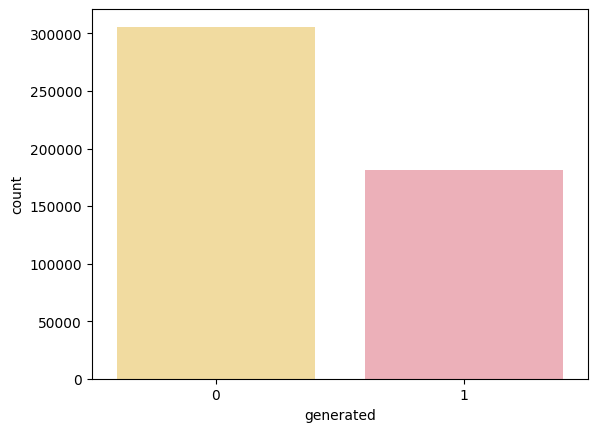

In [103]:
sns.countplot(df, x='generated', palette=['#ffe192','#f6a6b2'])
plt.show()

# Data Vitualization

In [104]:
from collections import Counter

def counter_word(text_col):
    count= Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

In [105]:
# count unique words in the 'text' column
word_counter_all = counter_word(df['text'])

In [ ]:
print(f'This dataset contains {len(word_counter_all)} unique words')

This dataset contains 544828 unique words


## Bar Plot (Most Common Words)

In [ ]:
n_words = 50
most_occur_words = word_counter_all.most_common(n_words)

# create dataframe
most_occur_words_df = pd.DataFrame(most_occur_words, columns=['word', 'count'])

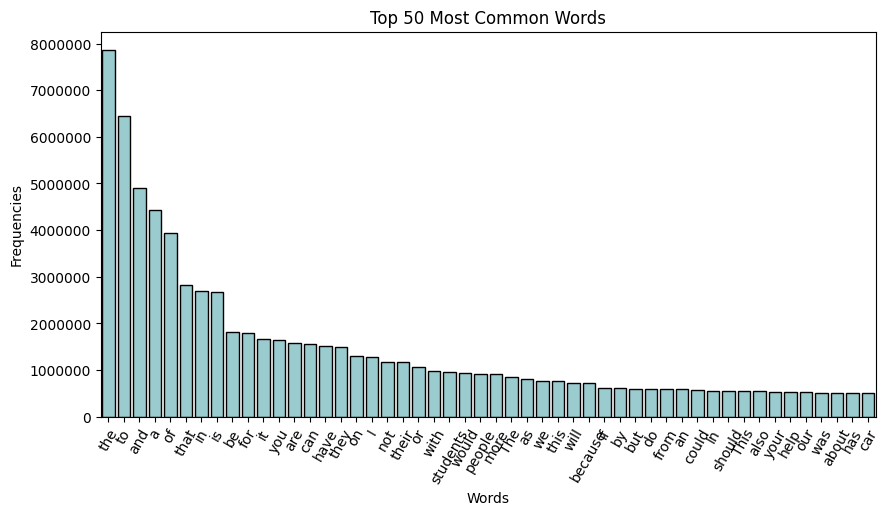

In [ ]:
# plot bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=most_occur_words_df, x='word', y='count', color='#90d2d8', edgecolor='black')
plt.xticks(rotation=60)
plt.title(f'Top {n_words} Most Common Words')
plt.ylabel('Frequencies')
plt.xlabel('Words')
plt.ticklabel_format(style='plain', axis='y') # disable scientific notation
plt.show()

## Word Cloud

In [ ]:
most_occur_500 = word_counter_all.most_common(500)

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=100,
    max_words=100,
    background_color='white',
    stopwords=stopwords
).generate(' '.join([x[0] for x in most_occur_500]))

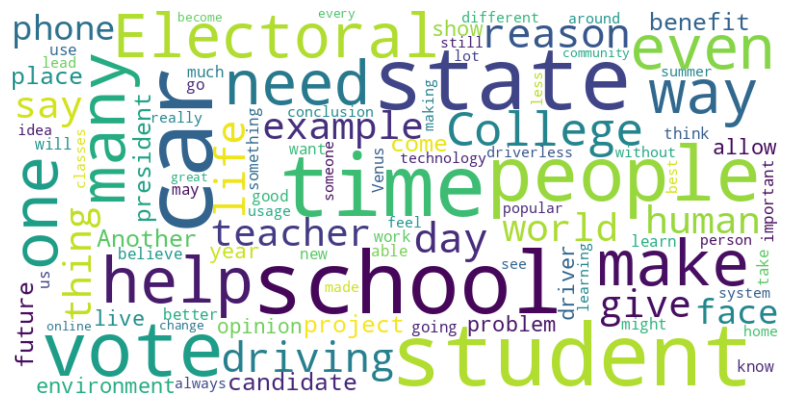

In [ ]:
# show WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sample (10k)

In [5]:
sample_n = 5000
df = df.groupby('generated')['text'].apply(lambda s: s.sample(n=sample_n, random_state=42)).reset_index()
df = df[['text', 'generated']].sample(frac=1, random_state=42)

In [118]:
len(df)

10000

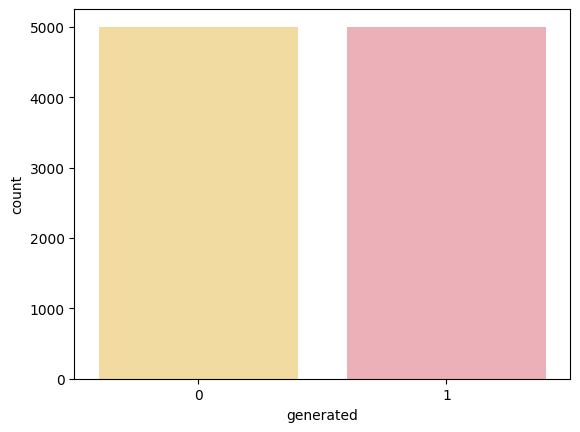

In [ ]:
sns.countplot(df, x='generated', palette=['#ffe192','#f6a6b2'])
plt.show()

# Data Preprocessing

In [6]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [7]:
punctuation_table = str.maketrans('', '', string.punctuation)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
# define a function to preprocess texts
def preprocess_text(text):
    text = text.replace('\n', ' ').translate(punctuation_table)
    tokens = word_tokenize(text)
    cleaned_tokens = [
        lemmatizer.lemmatize(token.lower())
        for token in tokens
        if token.lower() not in stop_words
    ]
    return ' '.join(cleaned_tokens)

In [9]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [10]:
df = df[['preprocessed_text', 'generated']]
df.sample(frac=1, random_state=42).head(10)

,preprocessed_text,generated
7217,dear senator ao writing today express strong s...,1
8291,challenge exploring venus genus 13 landed venu...,1
4607,know one shehe go know everybody phone likely ...,0
5114,dear senator writing express view united state...,1
1859,many people use car get one place another howe...,0
9583,introduction technology classroom game changer...,1
9828,f positive attitude crucial component achievin...,1
9863,unmasking face mar fascinating article discus ...,1
9991,distance learning topic debate many year rise ...,1
5908,positive thinking powerful tool make significa...,1


# Check Data

In [11]:
# check rows with empty string
rows_with_empty_str = df[df['preprocessed_text']==''].index

In [12]:
print(f'Rows {[i for i in rows_with_empty_str]} contain empty strings')

Rows [8533] contain empty strings


In [13]:
# drop rows with empty strings *
df.drop(rows_with_empty_str, inplace=True)

In [14]:
len(df)

9999

# Split the Dataset

In [15]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X = df['preprocessed_text']
y = df['generated']


# Training 80% / Validation 10% / Test 10%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [129]:
print(len(X_train))
print(len(y_train))
print(len(X_valid))
print(len(y_valid))
print(len(X_test))
print(len(y_test))

7999
7999
1000
1000
1000
1000


# Text Vectorization

In [16]:
vocab_size = 30000
sequence_length = round(np.mean([len(s.split()) for s in df['preprocessed_text']]))

In [17]:
from tensorflow.keras.layers import TextVectorization

# create a text vectorization layer
vectorizer = TextVectorization(
    max_tokens=vocab_size,
    output_sequence_length=sequence_length, # if not set the longest sequence in the dataset will be used
    name='vectorization_layer')

In [18]:
# Text Vectorization
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=100,encoding='utf-8')
vectorizer.adapt(X_train)


In [19]:
vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 20000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 100,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 20000}

## Test the Vectorizer

In [20]:
# most common words in vocabulary
vocabs = np.array(vectorizer.get_vocabulary())
vocabs[:50]

array(['', '[UNK]', 'student', 'car', 'people', 'would', 'school', 'also',
       'help', 'like', 'time', 'one', 'make', 'electoral', 'could',
       'state', 'college', 'vote', 'get', 'life', 'may', 'way', 'many',
       'work', 'think', 'thing', 'need', 'take', 'even', 'class', 'venus',
       'u', 'new', 'better', 'good', 'important', 'use', 'system', 'day',
       'know', 'want', 'phone', 'teacher', 'face', 'example', 'activity',
       'driving', 'president', 'dont', 'believe'], dtype='<U75')

In [140]:
X_train[1]

'article challenge exploring venus author suggest studying venus worthy pursuit despite danger present according passage explain reasoning give explanation made statement venus simple see distant know evening star safe vantage point earth proven challenging place examine closely often referred earth twin venus closest planet earth term density size occasionally closest distance one biggest difference thick atmosphere almost 97 percent carbon dioxide blanket venus highly corrosive sulfuric acid cloud venus atmosphere made seriously challenging farther study venus human sent numerous spacecraft land cloud draped world according text mission unmanned good reason since spacecraft survived landing hour maybe issue explains single spaceship touched venus three decade venus found dangerous challenging farther study yet scientist still discussing farther visit surface fascination venus may well earthlike planet solar system according text long ago venus probably covered largely ocean could sup

In [163]:
#encoded example with output sequence length of 100 , 0 padding 
vectorized_example = vectorizer("I love machine learning")
print(vectorized_example)

tf.Tensor(
[6222  406 1200   53    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0], shape=(100,), dtype=int64)


In [142]:
print(len(vectorized_example[0]))
print(len(vectorized_example[1]))

100
100


# Neural Network + Embedding

In [21]:
embedding_dim = round(vocab_size**0.25) # 4th root

print(f'vocab_size = {vocab_size}')
print(f'embedding_dim = {embedding_dim}')
print(f'sequence_length = {sequence_length}')

vocab_size = 30000
embedding_dim = 13
sequence_length = 205


# Create the Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Input ,Dropout
from tensorflow.keras.models import Model

In [24]:
input_layer = Input(shape=(1,), dtype=tf.string)
vectorized_text = vectorizer(input_layer)
embedding_layer = Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=128)(vectorized_text)
brnn_layer = Bidirectional(LSTM(64))(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(brnn_layer)


model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [156]:
X_train[:4]

3900    face natural landform bx huge rock formation 3...
3643    people ask advice sometimes talk one person pe...
5623    summer project long stable many student summer...
7012    much said broad knowledge many academic subjec...
Name: preprocessed_text, dtype: object

In [126]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_2            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,658,945 (10.14 MB)

 Trainable params: 2,658,945 (10.14 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [25]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_valid, y_valid),
    callbacks=[es]
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.7468 - loss: 0.5049 - val_accuracy: 0.9660 - val_loss: 0.1064
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.9771 - loss: 0.0788 - val_accuracy: 0.9710 - val_loss: 0.0913
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9927 - loss: 0.0285 - val_accuracy: 0.9630 - val_loss: 0.1221
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9955 - loss: 0.0181 - val_accuracy: 0.9710 - val_loss: 0.1097
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.9925 - loss: 0.0245 - val_accuracy: 0.9660 - val_loss: 0.0998


In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(history.history['loss'], label='train_loss')
ax1.plot(history.history['val_loss'], label='val_loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Binary Crossentropy')
ax1.grid(True)
ax1.legend()

ax2.plot(history.history['accuracy'], label='train_accuracy')
ax2.plot(history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True)
ax2.legend()

plt.show()

<Figure size 1000x400 with 2 Axes>

# Evaluation

In [148]:
# predict
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


In [129]:
df_test = pd.read_csv("AI_Human.csv")

In [130]:
df_test['preprocessed_text'] = df_test['text'].apply(preprocess_text)

In [131]:
X = df_test["preprocessed_text"]
y = df_test["generated"]


In [136]:
df_test = df_test[['preprocessed_text', 'generated']]
#save the 
df_test.to_csv("AI_Human_preprocess.csv", index=False)

In [132]:
len(X)

487235

In [133]:
# loss & accuracy
loss, accuracy = model.evaluate(X, y)

print(f'\033[1m Model with Embedding: \033[0m')
print(f'\033[91m Loss on test set: {loss} \033[0m')
print(f'\033[94m Accuracy on test set: {accuracy} | {accuracy * 100:.2f}% \033[0m')

15227/15227 ━━━━━━━━━━━━━━━━━━━━ 392s 26ms/step - accuracy: 0.9765 - loss: 0.0757
 Model with Embedding: 
 Loss on test set: 0.08520430326461792 
 Accuracy on test set: 0.9735609889030457 | 97.36% 


In [134]:
#save model with its weights
model.save('final_model.h5')


In [39]:
import pickle


# Save the trained model and tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL,)

UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f605' in position 23409: character maps to <undefined>

In [48]:
# Load the saved model and tokenizer
loaded_model = tf.keras.models.load_model('final_model.h5')
loaded_model.summary()
# with open('tokenizer.pickle', 'rb') as handle:
#     loaded_vectorizer = pickle.load(handle)

# loaded_vectorizer = vectorizer

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_2            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,658,947 (10.14 MB)

 Trainable params: 2,658,945 (10.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [114]:
df_testing = pd.read_csv("AI_Human.csv")

In [111]:
loaded_model = tf.keras.models.load_model('final_model.h5')

In [26]:
import gradio as gr

# Define the prediction function
def predict(text):
    # Preprocess the input text
    text = preprocess_text(text)
    # seq = loaded_vectorizer(text)
    prediction = model.predict(pd.Series(text))
    return f"{prediction[0][0]*100}% AI Generated" 

# Create and launch the Gradio interface
interface = gr.Interface(fn=predict, inputs="text", outputs="text")
interface.launch()

c:\Users\Galhom\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [78]:
model.evaluate(X_train, y_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9942 - loss: 0.0319


[0.0314972810447216, 0.9934991598129272]

In [80]:
model.evaluate(X_valid, y_valid)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9738 - loss: 0.0948


[0.09893272072076797, 0.9729999899864197]

In [91]:
model.predict(pd.Series("Sports have always played a significant role in bringing people together, transcending cultural and geographical boundaries. They offer a platform for athletes to showcase their skills and provide fans ."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.8409659]], dtype=float32)

In [101]:
print(X_test[:3])
print(y_test[:3])

5273    introduction advent autonomous driving technol...
5111    eighth grade student believe school allow stud...
1190    dear senator would like argue favor keeping el...
Name: preprocessed_text, dtype: object
5273    1.0
5111    1.0
1190    0.0
Name: generated, dtype: float64


In [104]:
sample_text="dear senator would like argue favor keeping electoral college believe electoral college vote help president hake greater chance becoming elected process also make fair game becoming elected president president though vote presidential candidate youre actually voting slate elector mentioned electoral note make fair game everyone state electoral college requires presidential candidate hake transregional appeal mean presidential candidate get note based region region enough electoral note elect president gain note increasing plurality state know win result unlikely success president electoral college restores weight political balance large state lose virtue apportionment senate decreed constitution electoral college avoids problem election candidate receives majority note cast candidate win majority last cast cause complication presidential election process thats electoral college step produce clear winner sure argued electoral college method selecting president may best way getting potential voter candidate way thing make fair game keep system balanced electoral college established compromise constitution brought founding father something original think like instead taken away electoral college stay signed propername"
sample_text = preprocess_text(sample_text)

In [105]:
prediction = model.predict(pd.Series(sample_text))
prediction[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([0.23423478], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
